In [2]:
import utils 
import transformer 
import bar_distribution
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import prior 
matplotlib.use('TkAgg')
%matplotlib inline
import main
import importlib
device = torch.device("cuda")
importlib.reload(utils)
importlib.reload(transformer)
importlib.reload(bar_distribution)
importlib.reload(main)
importlib.reload(prior)
import random
from sklearn.cluster import KMeans
#####################################################################################################################################################
import warnings 
warnings.filterwarnings("ignore")

In [112]:
print(f"Using device: {torch.cuda.get_device_name(torch.cuda.current_device())}")
device = torch.device("cuda")
d_model, nhead, nhid, nlayers = 256, 4, 512, 4
seq_len = 100
num_epochs = 100
lr = 0.001
num_outputs = 10
batch_size = 300
in_features = 2
noise = False
warm_up_epochs = 5
seq_len = 200
std_variation=True
model = transformer.Transformer(d_model, nhead, nhid, nlayers,in_features=in_features, buckets_size=num_outputs).to(device)
print(f"total params:{sum(p.numel() for p in model.parameters())}")
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
scheduler = utils.get_cosine_schedule_with_warmup(optimizer, warm_up_epochs, num_epochs)
model.criterion = criterion

Using device: Quadro P1000
total params:2113034


In [113]:
%matplotlib inline
model.load_state_dict(torch.load("C:\\Users\\prajb\\OneDrive\\Documents\\TU Delft CSE Masters Y2\\Thesis Projects\\PFN clustering\\checkpoint_dirichlet_a100.pt", weights_only=True))
model.eval() 
print("")

In [120]:
%matplotlib inline
temp_batch_size = 10
train_X, train_Y, true_X,true_Y, batch_classes = prior.sample_dirichlet_clusters(batch_size=temp_batch_size,seq_len=seq_len, num_features=2, num_classes=5)
model.eval()
print("") 

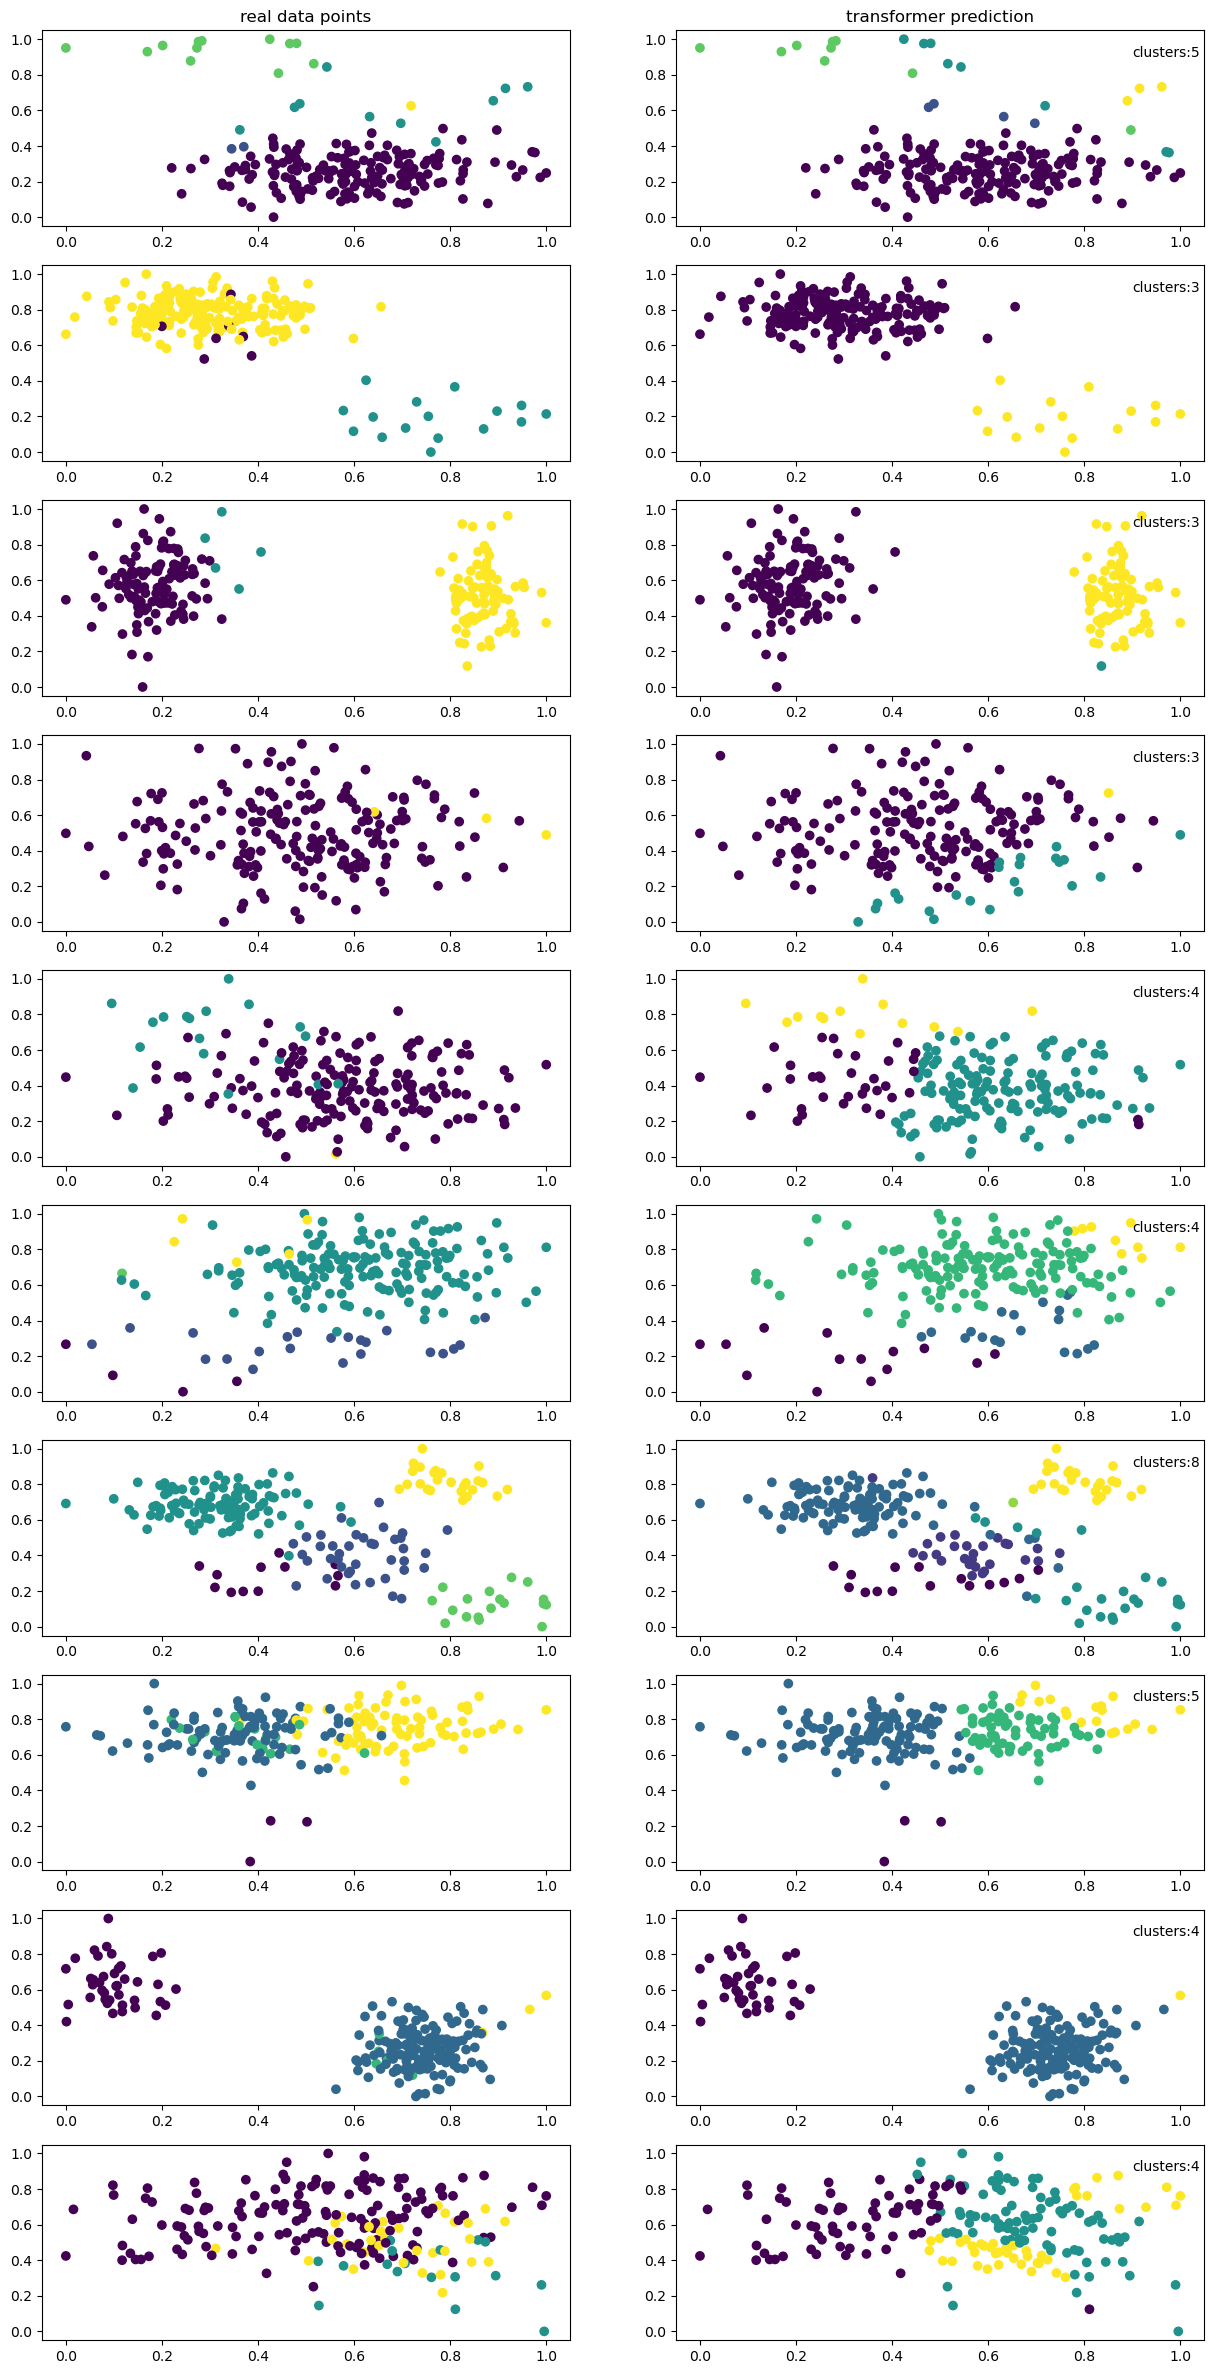

In [121]:
# # Set up grid for subplots
fig, axes = plt.subplots(temp_batch_size, 2, figsize=(15, 30)) 
axes = axes.flatten() 
for batch_index in range(temp_batch_size):
    train_x = train_X[:, batch_index].unsqueeze(1)
    true_x = true_X[:, batch_index].unsqueeze(1)
    train_y = train_Y[:, batch_index] 
    true_y = true_Y[:, batch_index]
    axes[2 * batch_index].scatter(train_x[:, 0, 0].cpu().numpy() , train_x[:,0, 1].cpu().numpy() , c=train_y.cpu().numpy())
    logits,cluster_output = model(train_x)
    logits = logits.squeeze(1)
    cluster_output = cluster_output.squeeze(1)
    predictions = torch.argmax(logits, dim=1)
    predictions_cluster_count = torch.argmax(cluster_output, dim=1)
    axes[2 * batch_index +1].scatter(train_x[:,0, 0].cpu().numpy() , train_x[:,0, 1].cpu().numpy() , c=predictions.cpu().numpy())
    axes[2 * batch_index + 1].text(0.9, 0.9, f"clusters:{predictions_cluster_count.cpu().item() + 1}") 

axes[1].set_title(f"transformer prediction")
axes[0].set_title(f"real data points")
plt.show()

In [12]:
# Example tensors
B, S = 2, 3  # Batch size, Sequence length
tensor_a = torch.arange(2).view(B, 1)
tensor_b = torch.randn(S, B, 5)     
print(tensor_a)
#print(tensor_b)
# # Expand tensor_a to match S dimension
tensor_a_expanded = tensor_a.unsqueeze(0).expand(S, -1, -1)
print(tensor_a_expanded)
print(tensor_b)
# # Concatenate along the last dimension
result = torch.cat([tensor_a_expanded, tensor_b], dim=-1) 
print(result)



tensor([[0],
        [1]])
tensor([[[0],
         [1]],

        [[0],
         [1]],

        [[0],
         [1]]])
tensor([[[ 0.5203, -0.6941, -0.5417,  0.9859,  1.2203],
         [-0.6801, -0.3268, -0.3393,  0.5929, -0.9408]],

        [[ 0.1580, -0.5838, -0.1397,  0.3096, -1.7434],
         [-0.3595,  1.1135, -1.1391,  0.7879,  1.7300]],

        [[-0.9813,  1.6509,  2.6109,  0.3177, -0.5458],
         [-1.3167, -1.7961, -0.3314,  0.1909,  0.1700]]])
tensor([[[ 0.0000,  0.5203, -0.6941, -0.5417,  0.9859,  1.2203],
         [ 1.0000, -0.6801, -0.3268, -0.3393,  0.5929, -0.9408]],

        [[ 0.0000,  0.1580, -0.5838, -0.1397,  0.3096, -1.7434],
         [ 1.0000, -0.3595,  1.1135, -1.1391,  0.7879,  1.7300]],

        [[ 0.0000, -0.9813,  1.6509,  2.6109,  0.3177, -0.5458],
         [ 1.0000, -1.3167, -1.7961, -0.3314,  0.1909,  0.1700]]])
